# Univariate Analysis

One of the simplest forms of statistical analysis is univariate analysis in which variables are analyzed one by one to understand the patterns in the data.

```{note}
Only descriptive statistics will be covered.
```

In [32]:
# Import necessary packages
import pandas as pd
import numpy as np
from scipy import stats
import plotly.graph_objects as go
import plotly.io as pio
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 800
svg_renderer.height = 500
pio.renderers.default = "svg"
import plotly.express as px

In [2]:
# Load data
df = pd.read_csv('./../../data/data.csv')

In [3]:
# Get the shape of the data
df.shape

(20632, 27)

In [4]:
# Get the column names of the data set
df.columns

Index(['index', 'id', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'category', 'spotlight', 'source_url', 'name_len',
       'name_len_clean', 'blurb_len', 'blurb_len_clean'],
      dtype='object')

## Numerical Variables

### Measures of Central Tendency and Dispersion

Central tendency is the descriptive summary of a data set. A single number reflects the center of the distribution of a variable. Popular measures of central tendency for numerical variables are mean and median.

In [15]:
# Select relevant numerical columns
relevant_numerical_columns = ['goal', 'usd_pledged', 'backers_count', 'static_usd_rate', 'name_len', 'blurb_len']

In [16]:
# Get the descriptive statistics for each of the relevant numerical columns
df[relevant_numerical_columns].describe()

,goal,usd_pledged,backers_count,static_usd_rate,name_len,blurb_len
count,2.063200e+04,2.063200e+04,20632.000000,20632.000000,20627.000000,20627.000000
mean,9.410497e+04,2.091591e+04,183.675843,1.039363,5.940806,18.991177
std,1.335511e+06,1.154717e+05,1222.012658,0.230419,2.826118,4.632371
min,1.000000e+00,0.000000e+00,0.000000,0.045641,1.000000,1.000000
25%,4.000000e+03,2.500000e+01,2.000000,1.000000,4.000000,17.000000
50%,1.400000e+04,7.163012e+02,12.000000,1.000000,6.000000,20.000000
75%,5.000000e+04,6.004628e+03,63.000000,1.000000,8.000000,22.000000
max,1.000000e+08,6.225355e+06,105857.000000,1.715913,16.000000,35.000000


Following observations can be stated from the above statistics:
1. All the numerical columns are right-skewed. Moreover, *goal*, *pledged*, *backers_count* are heavily skewed signifying the existence of potential outliers.
2. There exist projects which could not raise a single penny and also did not have a single backer.
3. The pledged amounts are less dispersed around a smaller arithmetic mean than the goal amounts.
4. *static_usd_rates* and *name_len* have nearly equal mean and median signifying the potential existence of a normal distribution with different variances.

### Distributions

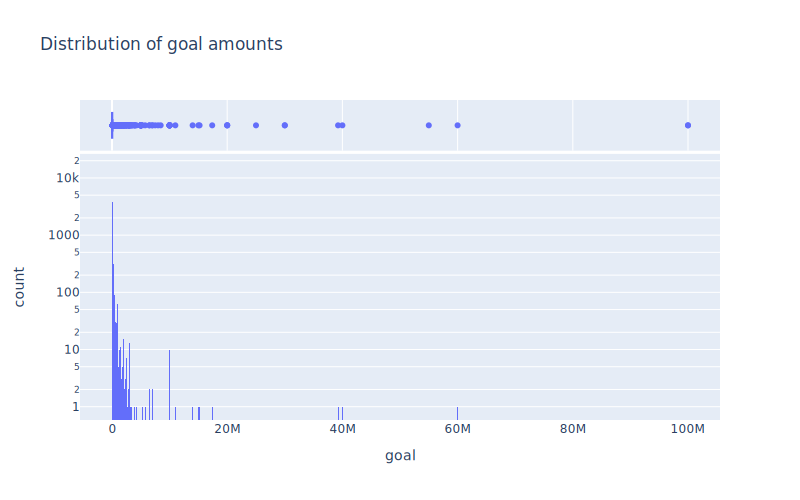

In [17]:
# Plot distribution of 'goal' variable
fig = px.histogram(df, x='goal', log_y=True, marginal='box', title='Distribution of goal amounts')
fig.show()

The box plot ends near zero itself and is not visible. Hence, it would be better to check the distribution over a shorter range.

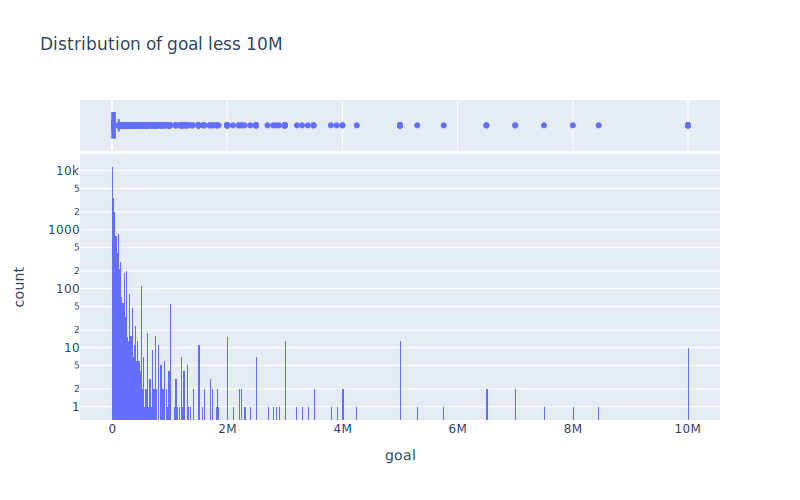

In [18]:
# Plot distibution of 'goal' variable from 0-10M.
fig = px.histogram(df[df['goal']<=10000000], x='goal', log_y=True, marginal='box', title='Distribution of goal less 10M')
fig.show()

There are very few observations that are present beyond 1M. Hence for the analysis observations with goal less than 1M will be considered. Also, it will be better to let go observations beyond 1M as such projects have different characteristics than those below 1M and hence require separate analysis.

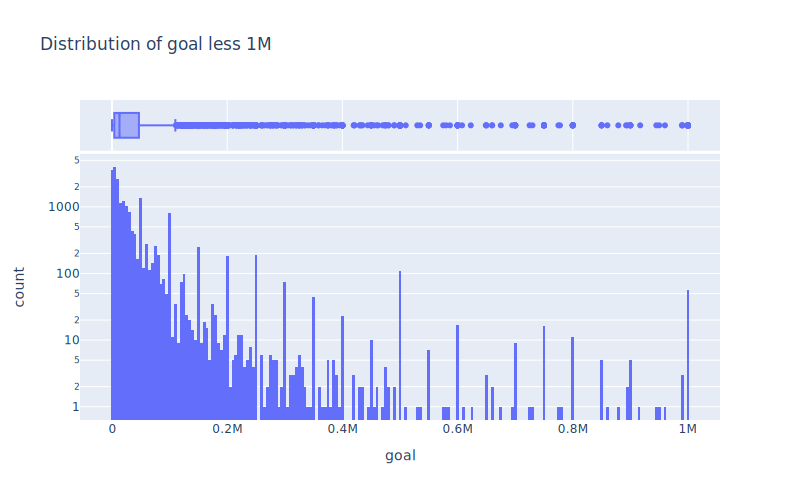

In [19]:
# Plot distibution of 'goal' variable from 0-1M.
fig = px.histogram(df[df['goal']<=1000000], x='goal', log_y=True, marginal='box', title='Distribution of goal less 1M')
fig.show()

Even in the range of 0-1M, very few projects exist that have goals beyond 0.5M. But since all projects with 1M goal range have similar characteristics, there will be a significant of loss of information if the range is further shortened.
Also, the distribution contains spikes at certain amounts. These spikes exist at amounts whose first 2 digits are multiple of 5. Naturally, it makes sense that people prefer these amount more than anything else but it is astonishing to know that people also prefer other numbers for setting the goal.

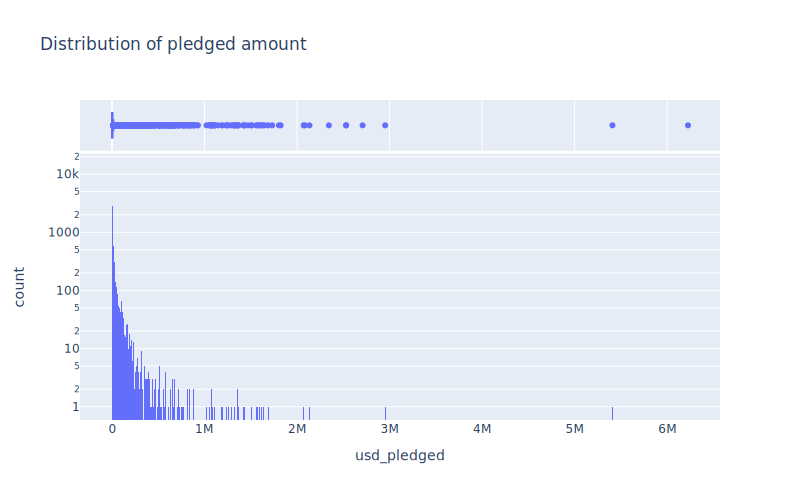

In [20]:
# Plot the distribution of 'pledged' variable
fig = px.histogram(df, x='usd_pledged', log_y=True, marginal='box', title='Distribution of pledged amount')
fig.show()

The story repeats for the pledged amount. There are very few observations that are present beyond 1M.

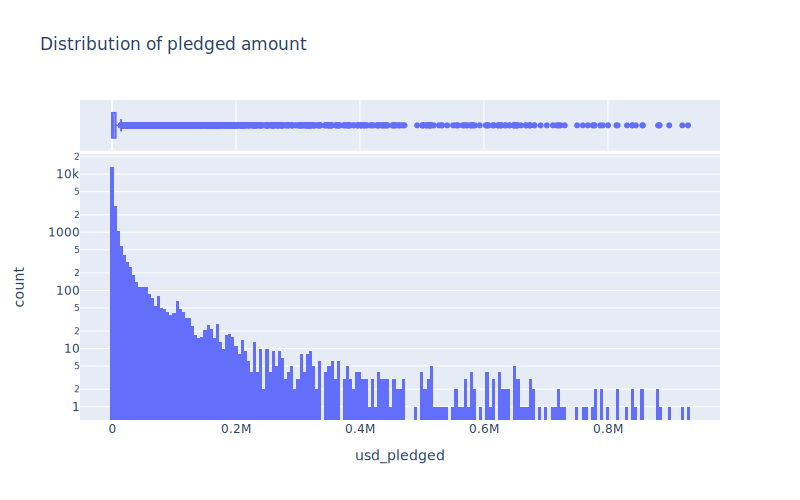

In [21]:
# Plot the distribution of 'pledged' variable for the range 0-1M
fig = px.histogram(df[df['usd_pledged']<=1000000], x='usd_pledged', log_y=True, marginal='box', title='Distribution of pledged amount')
fig.show()

Visually, it seems that this variable has a distribution similar to the goal, it can be inferred that there is no discrepancy in the goal variable. Moreover, this variable will be dropped since it can not be known before the campaign launch.

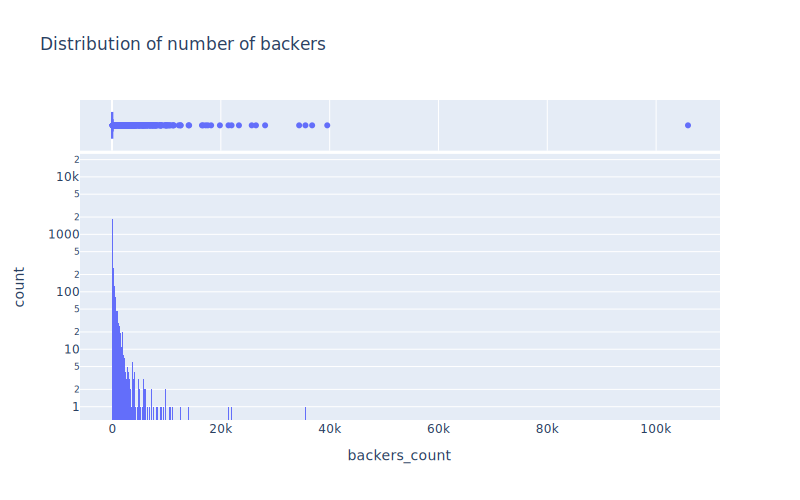

In [52]:
# Plot the distribution of 'backers_count' variable
fig = px.histogram(df, x='backers_count', log_y=True, marginal='box', title='Distribution of number of backers')
fig.show()

Even the distribution of the number of backers is highly skewed. The box plot is not even visible. It will be beneficial to check at a lower range of values.

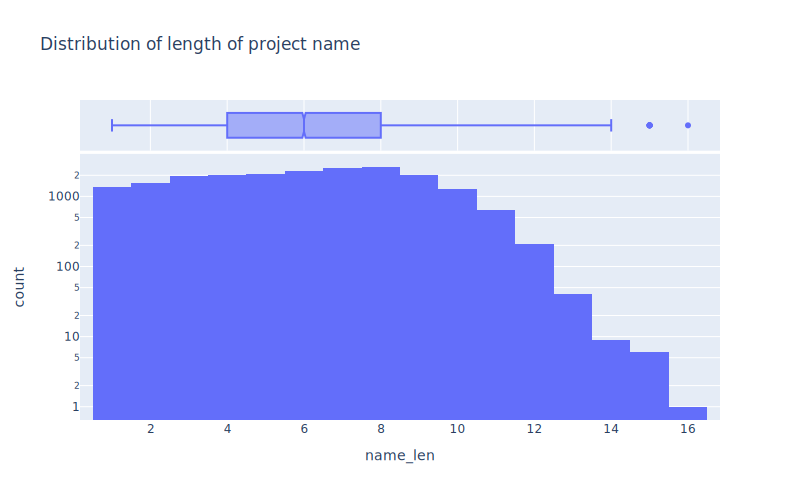

In [22]:
# Plot the distribution of 'name_len' variable
fig = px.histogram(df, x='name_len', log_y=True, marginal='box', title='Distribution of length of project name')
fig.show()

Mostly, the lengths of project names are below 12. According to the box plot, project names with lengths 15 to 16 are outliers. Since the numbers of observations are too low, they can be safely removed, since there will not be much loss of information.

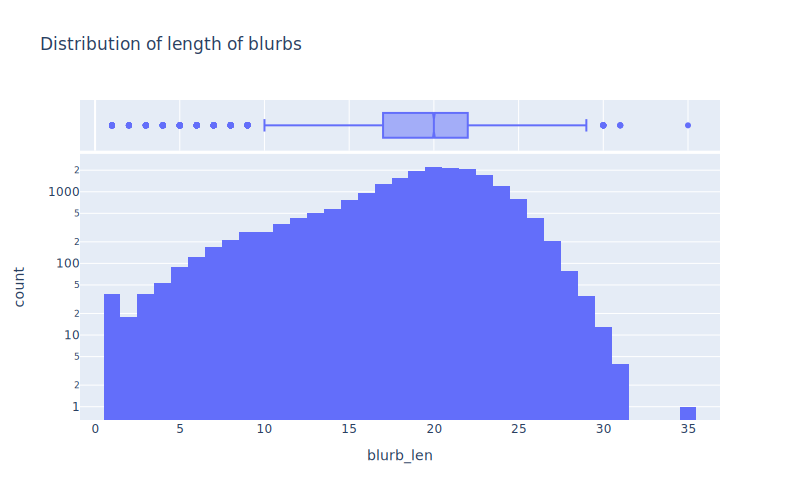

In [35]:
# Plot the distibution of 'blurb_len' variable
fig = px.histogram(df, x='blurb_len', log_y=True, marginal='box', title='Distribution of length of blurbs')
fig.show()

According to the box plot, lengths of blurbs less than 10 and more than 28 are not normal. Since the number of observations of such records are less, they can be safely removed without the loss of much information. Also, intuitively it makes sense that blurbs with length less than 10 cannot provide much information about the project and such projects cannot be modelled properly.

## Categorical Variables

### Measure of Central Tendency

For categorical variables, the measure of central tendency is expressed by mode.

In [38]:
# Select relevant categorical variables
relevant_categorical_variables = ['state', 'disable_communication', 'country', 'currency', 'staff_pick', 'category', 'spotlight']

In [40]:
# Find the mode of the relevant categorical columns
df[relevant_categorical_variables].mode()

,state,disable_communication,country,currency,staff_pick,category,spotlight
0,failed,False,US,USD,False,Web,False


The above table gives the dominant values for each of the relevant categorical variables. Thus, it can be inferred that:
1. Most of the projects are fails
2. Communication is enabled for most of the projects. Thus donors can interact with the project creators and get their queries sorted.
3. Majority of the projects come from the US and thus dominant currency is USD.
4. Very few projects are picked up by the staff to promote.
5. Web projects dominate the crowdfunding market.
6. Less number of projects are highlighted in the spotlight of Kickstarter.

### Distribution

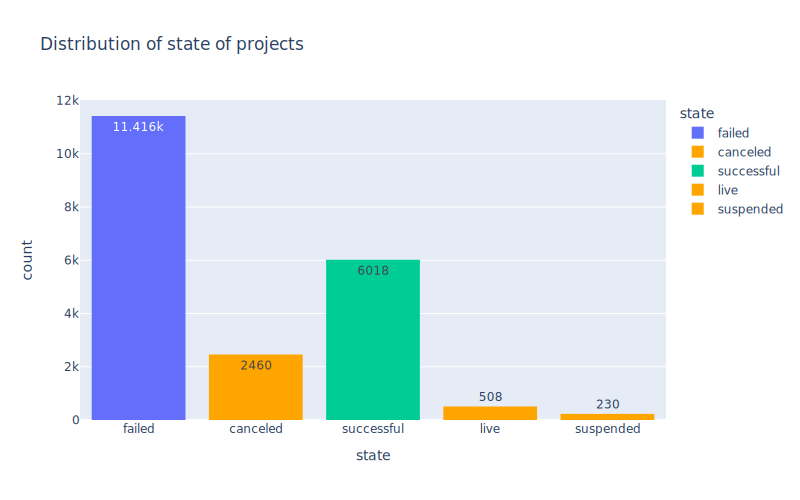

In [53]:
# Plot the distribution of 'state' variable
color_discrete_sequence = ['orange']*df['state'].nunique()
color_discrete_sequence[0] = 'light blue'
color_discrete_sequence[2] = 'light green'
fig = px.histogram(df, x='state', 
                    text_auto=True, 
                    color_discrete_sequence=color_discrete_sequence, 
                    color = 'state', 
                    title='Distribution of state of projects')
fig.show()

There are multiple states of the project as depicted by the above bar chart. But the analysis will be performed for successful and failed projects. The number of successful projects are slightly more than half of the number of failed projects.

The other categories cannot be predicted since there exist certain unique reasons for a project to be canceled and suspended guided by the guideline of the platform.

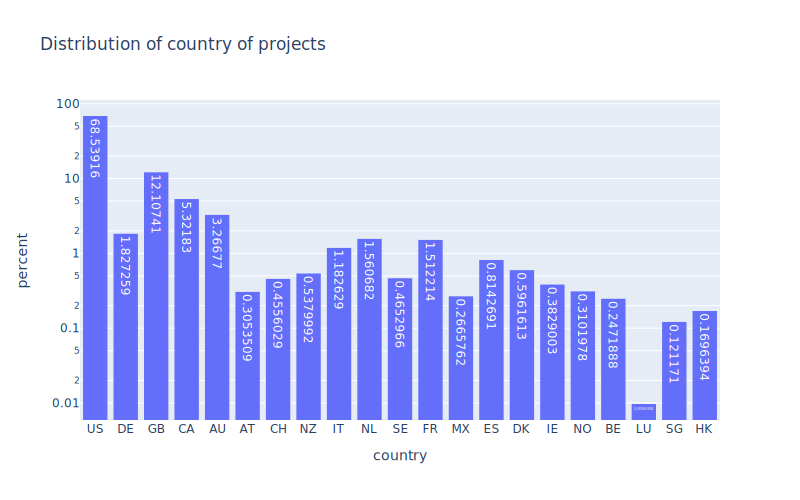

In [47]:
# Plot the distribution of 'country' variable
fig = px.histogram(df, x='country', text_auto=True, histnorm='percent', log_y=True, title='Distribution of country of projects')
fig.show()

There are certain countries whose proportion is less than 1%. If *country* is one-hot encoded, then they will create variable with less than 1% variance and hence can distort the output of certain models. Hence it is better to remove such countries. Since they are less in number, they provide little information to the model and the possibility of dominance from records of other countries increases.

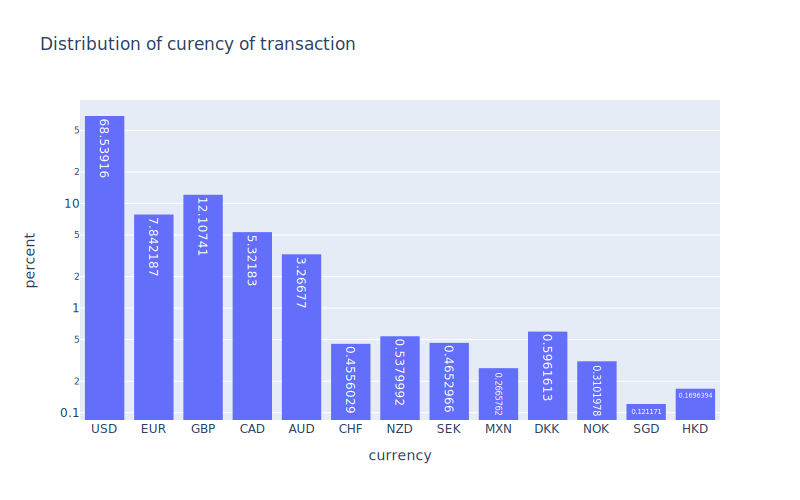

In [50]:
# Plot the distribution of 'currency' variable
fig = px.histogram(df, x='currency', text_auto=True, histnorm='percent', log_y=True, title='Distribution of curency of transaction')
fig.show()

The same logic goes for currencies. It will be beneficial to remove currencies having proportion less than 1%.

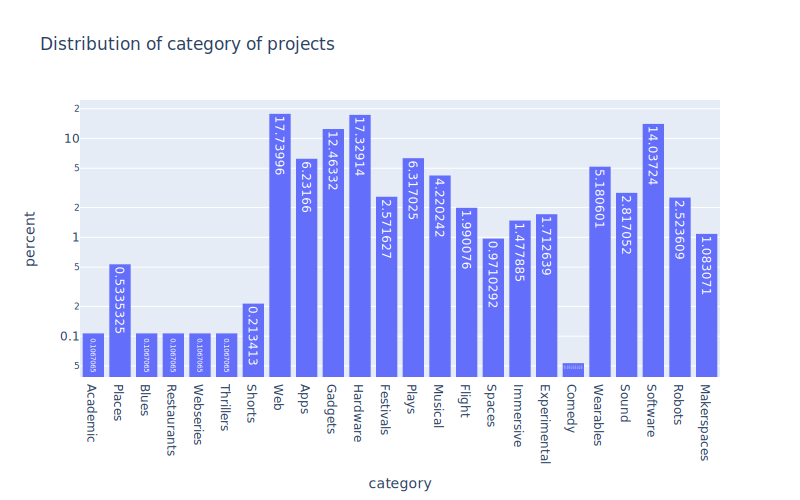

In [51]:
# Plot the distribution of 'category' variable
fig = px.histogram(df, x='category', text_auto=True, histnorm='percent', log_y=True, title='Distribution of category of projects')
fig.show()

Categories with less than 1% of the total number of observations will not be able to any meaningly information to the models and other categories with a larger number of records can dominate. Hence, categories with less 1% of the total number of records will be removed.

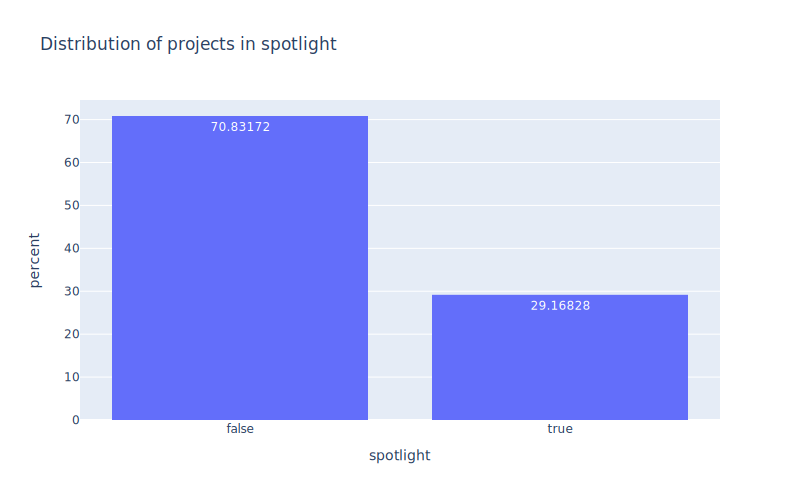

In [55]:
# Plot the distribution of 'spotlight' variable
fig = px.histogram(df, x='spotlight', text_auto=True, histnorm='percent', title='Distribution of projects in spotlight')
fig.show()

Less than a third number of projects find a place in the spotlight section of Kickstarter.

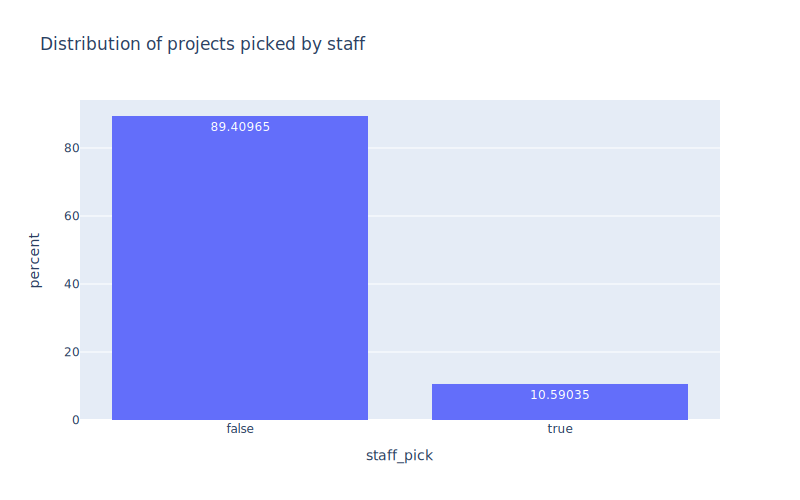

In [56]:
# Plot the distribution of 'staff_pick' variable
fig = px.histogram(df, x='staff_pick', text_auto=True, histnorm='percent', title='Distribution of projects picked by staff')
fig.show()

The probability of a project getting picked up by staff is too small. Staff promotion ensures greater success for the project.